# Descripción de la base de datos

Se desea hacer un análisis para poder visualizar las variables más importantes para que un equipo sea exitoso (gane partidos), tanto en temporada regular como en post-temporada. Para ello se usará la base: "NBA Dataset - Box Scores & Stats, 1947 - Today", para ello se tomará solamente 4 tablas, las más relevantes para poder hacer nuestro análisis.

### Games.csv

Contiene todos los datos relacionados a los juegos. Las variables de interés en nuestro análisis son las siguentes: 

* gameId
* gameDate
* winner
* attendance 
* gameType (temporada regular o post-temporada)

### PlayerStatistic.csv

Describe el desempeño de un un jugador en un partido específico, contiene todas las stats del jugador, por ello la mayoría de variables son de interés en esta tabla.

### Players.csv

A diferencia de PlayerStatistics.csv, esta tabla nos describe los parámetros físicos de los jugadores, a su vez de la posición que juegan y variables más específicas como la ronda en la que fue seleccionado.

### TeamStatistics.csv

La tabla con mayor información útil de la base de datos, en esta podemos ver las estadísticas de un equipo por partido.

# Lectura de base de datos

In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

In [2]:
BASE_DIR = Path().resolve()
DATA_DIR = BASE_DIR / 'database'

In [3]:
games = pd.read_csv( DATA_DIR / 'Games.csv', low_memory=False)

In [4]:
players_stats = pd.read_csv( DATA_DIR / 'PlayerStatistics.csv', low_memory=False)

In [5]:
players = pd.read_csv( DATA_DIR / 'Players.csv', low_memory=False)

In [6]:
team_stats = pd.read_csv( DATA_DIR / 'TeamStatistics.csv', low_memory=False)

In [7]:
players_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1635622 entries, 0 to 1635621
Data columns (total 35 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   firstName                1635622 non-null  object 
 1   lastName                 1635622 non-null  object 
 2   personId                 1635622 non-null  int64  
 3   gameId                   1635622 non-null  int64  
 4   gameDate                 1635622 non-null  object 
 5   playerteamCity           1635622 non-null  object 
 6   playerteamName           1635622 non-null  object 
 7   opponentteamCity         1635622 non-null  object 
 8   opponentteamName         1635622 non-null  object 
 9   gameType                 1628350 non-null  object 
 10  gameLabel                93882 non-null    object 
 11  gameSubLabel             5341 non-null     object 
 12  seriesGameNumber         135048 non-null   float64
 13  win                      1635622 non-null 

In [8]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72163 entries, 0 to 72162
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gameId            72163 non-null  int64  
 1   gameDate          72163 non-null  object 
 2   hometeamCity      72163 non-null  object 
 3   hometeamName      72163 non-null  object 
 4   hometeamId        72163 non-null  int64  
 5   awayteamCity      72163 non-null  object 
 6   awayteamName      72163 non-null  object 
 7   awayteamId        72163 non-null  int64  
 8   homeScore         72163 non-null  int64  
 9   awayScore         72163 non-null  int64  
 10  winner            72163 non-null  int64  
 11  gameType          71912 non-null  object 
 12  attendance        67130 non-null  float64
 13  arenaId           71879 non-null  float64
 14  gameLabel         3892 non-null   object 
 15  gameSubLabel      192 non-null    object 
 16  seriesGameNumber  5738 non-null   float6

In [9]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6679 entries, 0 to 6678
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   personId      6679 non-null   int64  
 1   firstName     6678 non-null   object 
 2   lastName      6677 non-null   object 
 3   birthdate     4676 non-null   object 
 4   lastAttended  4653 non-null   object 
 5   country       4676 non-null   object 
 6   height        4453 non-null   float64
 7   bodyWeight    4579 non-null   float64
 8   guard         5120 non-null   object 
 9   forward       5120 non-null   object 
 10  center        5120 non-null   object 
 11  draftYear     4676 non-null   float64
 12  draftRound    4515 non-null   float64
 13  draftNumber   4457 non-null   float64
dtypes: float64(5), int64(1), object(8)
memory usage: 730.6+ KB


In [10]:
team_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144326 entries, 0 to 144325
Data columns (total 48 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   gameId                   144326 non-null  int64  
 1   gameDate                 144326 non-null  object 
 2   teamCity                 144326 non-null  object 
 3   teamName                 144326 non-null  object 
 4   teamId                   144326 non-null  int64  
 5   opponentTeamCity         144326 non-null  object 
 6   opponentTeamName         144326 non-null  object 
 7   opponentTeamId           144326 non-null  int64  
 8   home                     144326 non-null  int64  
 9   win                      144326 non-null  int64  
 10  teamScore                144326 non-null  int64  
 11  opponentScore            144326 non-null  int64  
 12  assists                  109239 non-null  float64
 13  blocks                   103625 non-null  float64
 14  stea

In [11]:
players_stats.drop(['gameLabel', 'gameSubLabel'], axis=1, inplace=True)

In [12]:
games.drop(['gameLabel', 'gameSubLabel'], axis=1, inplace=True)

In [13]:
players.drop(['draftYear', 'draftNumber'], axis=1, inplace=True)

In [14]:
team_stats.drop(['coachId'], axis=1, inplace=True)

# Caracterización de datos en la base

### Descripción general del dataset

Origen: Los datasets usados para este análisis fueron obtenidos de [kaggle.com](https://www.kaggle.com/datasets/eoinamoore/historical-nba-data-and-player-box-scores/data) y fueron subidos por el usuario eoinamoore, en la descripción de kaggle se hace referencia a que los datos fueron obtenidos de la página oficial de la NBA, [NBA.com](https://www.nba.com/) mediante web scrapping.

Periodo de tiempo: Los datasets presentes en este análisis comprenden estadísticas y resultados de jugadores y equipos de la NBA desde 1947 a la actualidad, son históricos y, **son actualizados diariamente**.

Propósito del dataset: Se hace mención en kaggle que este dataset está diseñado para analistas y científicos de datos, y proporciona una base sólida para explorar la historia del baloncesto, el rendimiento de los jugadores y la dinámica de los equipos.

Número de tablas y observaciones: El dataset del repositorio cuenta con 7 tablas de las cuales se tomarán solamente 4, filtrando solamente las variables de interés. Las tablas de interés para nuestro análisis son las siguientes: Games, Players, TeamStatistics y PlayerStatistics con las siguientes dimensiones de observaciones y variables:

In [15]:
print(games.shape)
print(players.shape)
print(players_stats.shape)
print(team_stats.shape)

(72163, 15)
(6679, 12)
(1635622, 33)
(144326, 47)


### Tablas del dataset y sus variables

Este dataset contiene las siguientes variables con los siguientes tipos de dato definidos para cada una de las 4 tablas:

In [16]:
games.dtypes

gameId                int64
gameDate             object
hometeamCity         object
hometeamName         object
hometeamId            int64
awayteamCity         object
awayteamName         object
awayteamId            int64
homeScore             int64
awayScore             int64
winner                int64
gameType             object
attendance          float64
arenaId             float64
seriesGameNumber    float64
dtype: object

In [17]:
players.dtypes

personId          int64
firstName        object
lastName         object
birthdate        object
lastAttended     object
country          object
height          float64
bodyWeight      float64
guard            object
forward          object
center           object
draftRound      float64
dtype: object

In [18]:
players_stats.dtypes

firstName                   object
lastName                    object
personId                     int64
gameId                       int64
gameDate                    object
playerteamCity              object
playerteamName              object
opponentteamCity            object
opponentteamName            object
gameType                    object
seriesGameNumber           float64
win                          int64
home                         int64
numMinutes                 float64
points                     float64
assists                    float64
blocks                     float64
steals                     float64
fieldGoalsAttempted        float64
fieldGoalsMade             float64
fieldGoalsPercentage       float64
threePointersAttempted     float64
threePointersMade          float64
threePointersPercentage    float64
freeThrowsAttempted        float64
freeThrowsMade             float64
freeThrowsPercentage       float64
reboundsDefensive          float64
reboundsOffensive   

In [19]:
team_stats.dtypes

gameId                       int64
gameDate                    object
teamCity                    object
teamName                    object
teamId                       int64
opponentTeamCity            object
opponentTeamName            object
opponentTeamId               int64
home                         int64
win                          int64
teamScore                    int64
opponentScore                int64
assists                    float64
blocks                     float64
steals                     float64
fieldGoalsAttempted        float64
fieldGoalsMade             float64
fieldGoalsPercentage       float64
threePointersAttempted     float64
threePointersMade          float64
threePointersPercentage    float64
freeThrowsAttempted        float64
freeThrowsMade             float64
freeThrowsPercentage       float64
reboundsDefensive          float64
reboundsOffensive          float64
reboundsTotal              float64
foulsPersonal              float64
turnovers           

Se tienen las siguientes llaves primarias y foráneas por cada tabla:

* Players:
    * PK: personId
* Games:
    * PK: gameId
    * FK: hometeamId
    * FK: awayteamId
* Player Statistics:
    * FK: personId
    * FK: gameId
* Team Statistics:
    * FK: teamId
    * FK: gameId
    * FK: opponentTeamId


### Distribución actual de los datos del dataset

In [20]:
games.describe(include='all')

,gameId,gameDate,hometeamCity,hometeamName,hometeamId,awayteamCity,awayteamName,awayteamId,homeScore,awayScore,winner,gameType,attendance,arenaId,seriesGameNumber
count,7.216300e+04,72163,72163,72163,7.216300e+04,72163,72163,7.216300e+04,72163.000000,72163.000000,7.216300e+04,71912,67130.000000,7.187900e+04,5738.000000
unique,NaN,34171,47,39,NaN,51,43,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN
top,NaN,1995-11-03 20:00:00,Los Angeles,Lakers,NaN,Los Angeles,Celtics,NaN,NaN,NaN,NaN,Regular Season,NaN,NaN,NaN
freq,NaN,14,4905,3514,NaN,4733,3421,NaN,NaN,NaN,NaN,65538,NaN,NaN,NaN
mean,2.580861e+07,NaN,NaN,NaN,1.610613e+09,NaN,NaN,1.610479e+09,105.895958,102.323046,1.610613e+09,NaN,14982.632668,3.568417e+04,2.496340
std,6.424115e+06,NaN,NaN,NaN,8.660155e+00,NaN,NaN,1.468545e+07,14.269016,13.900190,8.635294e+00,NaN,5150.292256,1.852905e+05,2.017287
min,1.030000e+07,NaN,NaN,NaN,1.610613e+09,NaN,NaN,1.501600e+04,0.000000,0.000000,1.610613e+09,NaN,9.000000,0.000000e+00,0.000000
25%,2.130058e+07,NaN,NaN,NaN,1.610613e+09,NaN,NaN,1.610613e+09,96.000000,93.000000,1.610613e+09,NaN,11989.000000,5.000000e+00,1.000000
50%,2.630008e+07,NaN,NaN,NaN,1.610613e+09,NaN,NaN,1.610613e+09,106.000000,102.000000,1.610613e+09,NaN,16202.000000,4.400000e+01,2.000000
75%,2.870052e+07,NaN,NaN,NaN,1.610613e+09,NaN,NaN,1.610613e+09,115.000000,112.000000,1.610613e+09,NaN,18676.000000,1.350000e+02,4.000000


In [21]:
players.describe(include='all')

,personId,firstName,lastName,birthdate,lastAttended,country,height,bodyWeight,guard,forward,center,draftRound
count,6.679000e+03,6678,6677,4676,4653,4676,4453.000000,4.579000e+03,5120,5120,5120,4515.000000
unique,NaN,2224,3815,4314,678,79,NaN,NaN,2,2,2,NaN
top,NaN,John,Williams,1905-04-04,Kentucky,USA,NaN,NaN,False,False,False,NaN
freq,NaN,95,92,4,100,4247,NaN,NaN,3137,3000,4264,NaN
mean,4.362629e+07,NaN,NaN,NaN,NaN,NaN,78.030766,1.026727e+05,NaN,NaN,NaN,-0.542414
std,2.724150e+08,NaN,NaN,NaN,NaN,NaN,3.628986,3.760758e+05,NaN,NaN,NaN,6.714915
min,2.000000e+00,NaN,NaN,NaN,NaN,NaN,65.000000,3.000000e+00,NaN,NaN,NaN,-22.000000
25%,5.608750e+04,NaN,NaN,NaN,NaN,NaN,75.000000,1.950000e+02,NaN,NaN,NaN,-1.000000
50%,7.792200e+04,NaN,NaN,NaN,NaN,NaN,78.000000,2.150000e+02,NaN,NaN,NaN,1.000000
75%,1.626164e+06,NaN,NaN,NaN,NaN,NaN,81.000000,2.500000e+02,NaN,NaN,NaN,2.000000


In [22]:
players_stats.describe(include='all')

,firstName,lastName,personId,gameId,gameDate,playerteamCity,playerteamName,opponentteamCity,opponentteamName,gameType,...,threePointersPercentage,freeThrowsAttempted,freeThrowsMade,freeThrowsPercentage,reboundsDefensive,reboundsOffensive,reboundsTotal,foulsPersonal,turnovers,plusMinusPoints
count,1635622,1635622,1.635622e+06,1.635622e+06,1635622,1635622,1635622,1635622,1635622,1628350,...,1.634403e+06,1.634403e+06,1.634403e+06,1.634403e+06,1.634403e+06,1.634403e+06,1.634403e+06,1.634403e+06,1.634403e+06,1.634403e+06
unique,1873,3230,NaN,NaN,34171,51,43,51,43,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,John,Johnson,NaN,NaN,2013-04-17 20:00:00,Los Angeles,Celtics,Los Angeles,Lakers,Regular Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,26258,30859,NaN,NaN,308,108568,75327,109740,74934,1470402,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.835713e+05,2.538766e+07,NaN,NaN,NaN,NaN,NaN,NaN,...,1.158644e-01,2.366430e+00,1.782456e+00,4.224271e-01,2.173767e+00,8.521166e-01,3.774586e+00,1.975705e+00,1.033861e+00,-7.770421e-05
std,NaN,NaN,4.771358e+06,6.517427e+06,NaN,NaN,NaN,NaN,NaN,NaN,...,2.456173e-01,3.051521e+00,2.450529e+00,4.254008e-01,2.676531e+00,1.387185e+00,3.935880e+00,1.655524e+00,1.403044e+00,7.400197e+00
min,NaN,NaN,2.000000e+00,1.030000e+07,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-5.800000e+01
25%,NaN,NaN,1.737000e+03,2.120024e+07,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,NaN,NaN,7.708100e+04,2.500024e+07,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000e+00,2.000000e+00,1.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,3.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
75%,NaN,NaN,2.016010e+05,2.860062e+07,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000e+00,4.000000e+00,3.000000e+00,8.560000e-01,3.000000e+00,1.000000e+00,6.000000e+00,3.000000e+00,2.000000e+00,0.000000e+00


In [23]:
team_stats.describe(include='all')

,gameId,gameDate,teamCity,teamName,teamId,opponentTeamCity,opponentTeamName,opponentTeamId,home,win,...,biggestScoringRun,leadChanges,pointsFastBreak,pointsFromTurnovers,pointsInThePaint,pointsSecondChance,timesTied,timeoutsRemaining,seasonWins,seasonLosses
count,1.443260e+05,144326,144326,144326,1.443260e+05,144326,144326,1.443260e+05,144326.000000,144326.000000,...,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000
unique,NaN,34171,51,43,NaN,51,43,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,1995-11-03 20:00:00,Los Angeles,Lakers,NaN,Los Angeles,Lakers,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,28,9638,6891,NaN,9638,6891,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.580861e+07,NaN,NaN,NaN,1.610546e+09,NaN,NaN,1.610546e+09,0.500000,0.500000,...,10.197471,6.665864,15.412402,17.849488,48.721252,14.382902,4.867550,0.468995,15.875075,15.893438
std,6.424093e+06,NaN,NaN,NaN,1.038436e+07,NaN,NaN,1.038436e+07,0.500002,0.500002,...,2.783488,5.931738,6.630503,6.838366,10.576970,5.812822,4.084095,0.500919,14.578874,14.547085
min,1.030000e+07,NaN,NaN,NaN,1.501600e+04,NaN,NaN,1.501600e+04,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.130058e+07,NaN,NaN,NaN,1.610613e+09,NaN,NaN,1.610613e+09,0.000000,0.000000,...,8.000000,2.000000,11.000000,13.000000,42.000000,10.000000,2.000000,0.000000,3.000000,3.000000
50%,2.630008e+07,NaN,NaN,NaN,1.610613e+09,NaN,NaN,1.610613e+09,0.500000,0.500000,...,10.000000,5.000000,15.000000,17.000000,48.000000,14.000000,4.000000,0.000000,12.000000,12.000000
75%,2.870052e+07,NaN,NaN,NaN,1.610613e+09,NaN,NaN,1.610613e+09,1.000000,1.000000,...,12.000000,10.000000,19.750000,22.000000,56.000000,18.000000,7.000000,1.000000,25.000000,26.000000


De la distribución actual de los datos se derivan las siguientes observaciones en variables clave:

* Games:
    * gameDate: objeto -> datetime
    * gameType: objeto -> categoria
    * attendance: float -> entero
    * arenaId: float -> entero
    * seriesGameNumber: float -> entero

* Players:
    * birthDate: objeto -> datetime
    * guard: objeto -> boleano
    * forward: objeto -> boleano
    * center: objeto -> boleano
    * draftRound: float -> entero

* Player Statistics:
    * gameDate: objeto -> datetime
    * gameType: objeto -> categoria
    * home: objeto -> boleano
    * win: objeto -> boleano
    * seriesGameNumber: float -> entero

* Team Statistics:
    * gameDate: objeto -> datetime
    * home: objeto -> boleano
    * win: objeto -> boleano


        
        


### Visualización gráfica de datos relevantes

#### Distribución de puntos equipos locales

<function matplotlib.pyplot.show(close=None, block=None)>

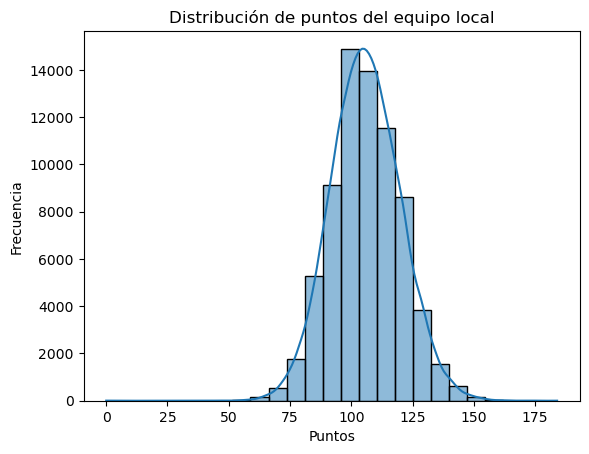

In [24]:
sns.histplot(games['homeScore'],bins=25,kde=True)
plt.title("Distribución de puntos del equipo local")
plt.xlabel("Puntos")
plt.ylabel("Frecuencia")
plt.show

#### Distribución de puntos de equipos visitantes

<function matplotlib.pyplot.show(close=None, block=None)>

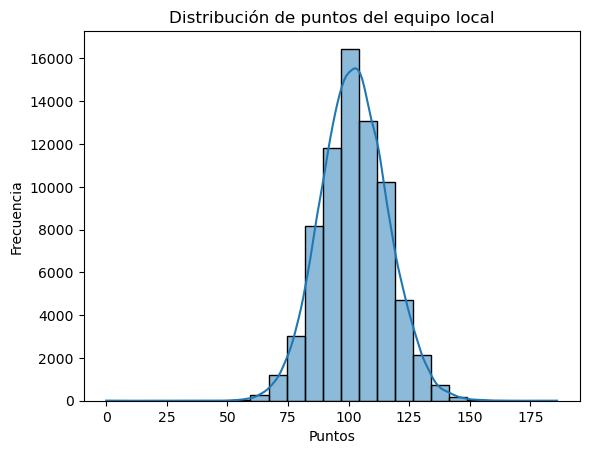

In [25]:
sns.histplot(games['awayScore'],bins=25,kde=True)
plt.title("Distribución de puntos del equipo local")
plt.xlabel("Puntos")
plt.ylabel("Frecuencia")
plt.show

#### Distribución de minutos jugados

<function matplotlib.pyplot.show(close=None, block=None)>

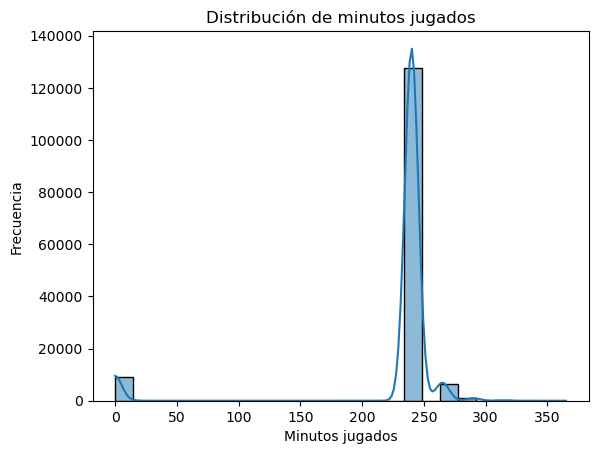

In [26]:
sns.histplot(team_stats['numMinutes'],bins=25,kde=True)
plt.title("Distribución de minutos jugados")
plt.xlabel("Minutos jugados")
plt.ylabel("Frecuencia")
plt.show

#### Distribución de altura y peso de los jugadores

<function matplotlib.pyplot.show(close=None, block=None)>

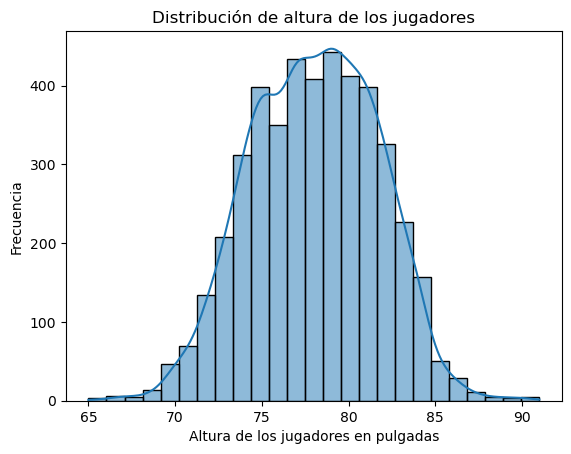

In [27]:
sns.histplot(players['height'],bins=25,kde=True)
plt.title("Distribución de altura de los jugadores")
plt.xlabel("Altura de los jugadores en pulgadas")
plt.ylabel("Frecuencia")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

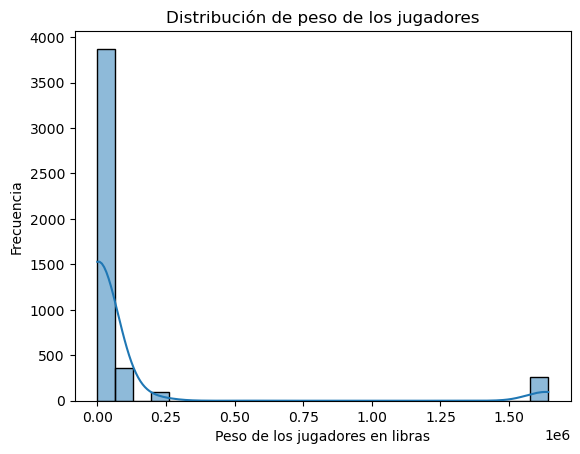

In [28]:
sns.histplot(players['bodyWeight'],bins=25,kde=True)
plt.title("Distribución de peso de los jugadores")
plt.xlabel("Peso de los jugadores en libras")
plt.ylabel("Frecuencia")
plt.show

#### Puntos locales por tipo de juego

Text(0.5, 1.0, 'Puntos por tipo de juego')

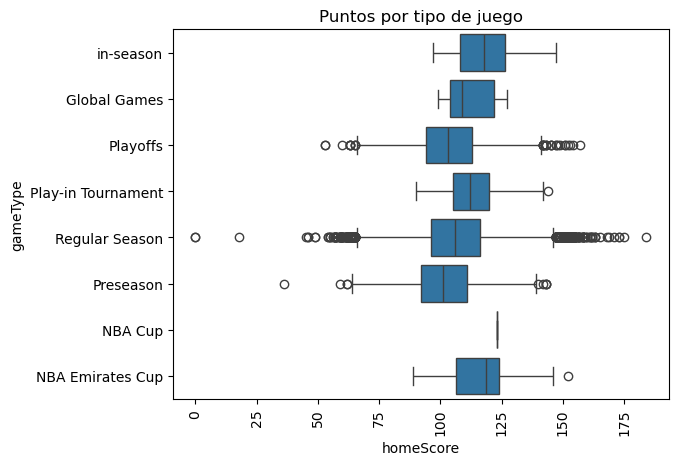

In [29]:
sns.boxplot(x='homeScore',y='gameType',data=games)
plt.xticks(rotation=90)
plt.title("Puntos por tipo de juego")

#### Puntos visitantes por tipo de juego

Text(0.5, 1.0, 'Puntos por tipo de juego')

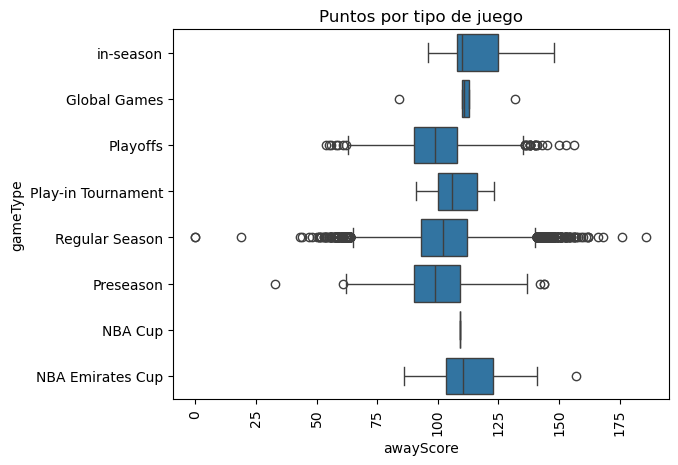

In [30]:
sns.boxplot(x='awayScore',y='gameType',data=games)
plt.xticks(rotation=90)
plt.title("Puntos por tipo de juego")

### Calidad de los datos

#### Datos faltantes

Se encontró el siguiente porcentaje de valores faltantes para cada una de las columnas del dataset:

In [31]:
(games.isnull().mean()*100).round(2)

gameId               0.00
gameDate             0.00
hometeamCity         0.00
hometeamName         0.00
hometeamId           0.00
awayteamCity         0.00
awayteamName         0.00
awayteamId           0.00
homeScore            0.00
awayScore            0.00
winner               0.00
gameType             0.35
attendance           6.97
arenaId              0.39
seriesGameNumber    92.05
dtype: float64

In [32]:
(players.isnull().mean()*100).round(2)

personId         0.00
firstName        0.01
lastName         0.03
birthdate       29.99
lastAttended    30.33
country         29.99
height          33.33
bodyWeight      31.44
guard           23.34
forward         23.34
center          23.34
draftRound      32.40
dtype: float64

In [33]:
(team_stats.isnull().mean()*100).round(2)

gameId                      0.00
gameDate                    0.00
teamCity                    0.00
teamName                    0.00
teamId                      0.00
opponentTeamCity            0.00
opponentTeamName            0.00
opponentTeamId              0.00
home                        0.00
win                         0.00
teamScore                   0.00
opponentScore               0.00
assists                    24.31
blocks                     28.20
steals                     28.51
fieldGoalsAttempted        23.77
fieldGoalsMade              0.01
fieldGoalsPercentage       23.83
threePointersAttempted     28.26
threePointersMade          20.69
threePointersPercentage    28.75
freeThrowsAttempted         3.53
freeThrowsMade              0.01
freeThrowsPercentage        3.54
reboundsDefensive          28.74
reboundsOffensive          28.64
reboundsTotal              24.07
foulsPersonal               2.77
turnovers                  28.28
plusMinusPoints             0.70
numMinutes

In [34]:
(players_stats.isnull().mean()*100).round(2)

firstName                   0.00
lastName                    0.00
personId                    0.00
gameId                      0.00
gameDate                    0.00
playerteamCity              0.00
playerteamName              0.00
opponentteamCity            0.00
opponentteamName            0.00
gameType                    0.44
seriesGameNumber           91.74
win                         0.00
home                        0.00
numMinutes                  9.96
points                      0.07
assists                     0.07
blocks                      0.07
steals                      0.07
fieldGoalsAttempted         0.07
fieldGoalsMade              0.07
fieldGoalsPercentage        0.07
threePointersAttempted      0.07
threePointersMade           0.07
threePointersPercentage     0.07
freeThrowsAttempted         0.07
freeThrowsMade              0.07
freeThrowsPercentage        0.07
reboundsDefensive           0.07
reboundsOffensive           0.07
reboundsTotal               0.07
foulsPerso

#### Datos duplicados

Se encontraron los siguientes valores duplicados en el dataset:

In [35]:
games.duplicated(subset=['gameId']).sum()

np.int64(0)

In [36]:
players.duplicated(subset=['personId']).sum()

np.int64(0)

In [37]:
players_stats.duplicated(subset=['personId','gameId']).sum()

np.int64(0)

In [38]:
team_stats.duplicated(subset=['teamId','gameId']).sum()

np.int64(0)

### Observaciones de la caracterización de datos

* No se encontraron valores duplicados con las llaves proporcionadas para cada dataset
* La tabla games tiene nulls en variables mayormente categóricas, la tabla players tiene nulls en variables que pueden ser importantes como altura, peso y la posición, la tabla team statistics tiene nulls en muchas de las variables numéricas, la tabla player statistics tiene nulls en la variable de minutos jugados y en un pequeño porcentaje en las demás estadísticas de jugadores.
* De las gráficas y los percentiles se encontró que la variable del peso en la tabla players puede tener un problema en sus unidades.
* Se debe realizar el tratamiento para corregir el tipo de dato de las variables mencionadas.

# Estadísticas Descriptivas

Se incluyen como parte del análisis los siguientes resumenes en agrupaciones por variables clave:

Cantidad de juegos por cada tipo de temporada:

In [39]:
games['gameType'].value_counts(dropna=False)

gameType
Regular Season        65538
Playoffs               4441
Preseason              1802
NaN                     251
NBA Emirates Cup         66
Play-in Tournament       31
in-season                28
Global Games              5
NBA Cup                   1
Name: count, dtype: int64

Resumen de puntos locales por tipo de juego

In [40]:
games.groupby('gameType',dropna=False)['homeScore'].agg(media='mean',
                                           minimo= 'min',
                                           p25= lambda x: x.quantile(0.25),
                                           mediana='median',
                                           p75 = lambda x: x.quantile(0.75),
                                           p95 = lambda x: x.quantile(0.95),
                                           maximo = 'max'
                                           ).round(2)

,media,minimo,p25,mediana,p75,p95,maximo
gameType,,,,,,,
Global Games,112.20,99,104.00,109.0,122.00,126.00,127
NBA Cup,123.00,123,123.00,123.0,123.00,123.00,123
NBA Emirates Cup,117.29,89,106.25,118.5,124.00,138.25,152
Play-in Tournament,113.61,90,105.00,112.0,120.00,137.00,144
Playoffs,103.62,53,94.00,103.0,113.00,126.00,157
Preseason,101.55,36,92.00,101.0,111.00,124.00,143
Regular Season,106.10,0,96.00,106.0,116.00,130.00,184
in-season,118.75,97,108.00,118.0,126.25,140.00,147
NaN,117.70,81,109.00,117.0,126.00,137.50,152


In [41]:
games[games["homeScore"]==0]

,gameId,gameDate,hometeamCity,hometeamName,hometeamId,awayteamCity,awayteamName,awayteamId,homeScore,awayScore,winner,gameType,attendance,arenaId,seriesGameNumber
473,22400988,2025-04-01 20:00:00,San Antonio,Spurs,1610612759,Orlando,Magic,1610612753,0,0,1610612753,Regular Season,NaN,1000118.0,0.0
570,22400627,2025-03-19 21:00:00,Utah,Jazz,1610612762,Washington,Wizards,1610612764,0,0,1610612764,Regular Season,NaN,1000106.0,0.0


Resumen de puntos visitantes por tipo de juego

In [42]:
games.groupby('gameType',dropna=False)['awayScore'].agg(media='mean',
                                           minimo= 'min',
                                           p25= lambda x: x.quantile(0.25),
                                           mediana='median',
                                           p75 = lambda x: x.quantile(0.75),
                                           p95 = lambda x: x.quantile(0.95),
                                           maximo = 'max'
                                           ).round(2)

,media,minimo,p25,mediana,p75,p95,maximo
gameType,,,,,,,
Global Games,110.00,84,110.00,111.0,113.00,128.20,132
NBA Cup,109.00,109,109.00,109.0,109.00,109.00,109
NBA Emirates Cup,112.61,86,103.25,110.5,122.75,131.00,157
Play-in Tournament,106.94,91,100.00,106.0,116.00,122.50,123
Playoffs,99.14,54,90.00,99.0,108.00,122.00,156
Preseason,99.46,33,90.00,99.0,109.00,123.00,144
Regular Season,102.55,0,93.00,102.0,112.00,126.00,186
in-season,115.36,96,107.75,110.0,125.00,133.65,148
NaN,115.25,74,107.00,116.0,123.50,135.00,147


Asistencia por tipo de juego

In [43]:
games.groupby('gameType',dropna=False)['attendance'].agg(media='mean',
                                           minimo= 'min',
                                           p25= lambda x: x.quantile(0.25),
                                           mediana='median',
                                           p75 = lambda x: x.quantile(0.75),
                                           p95 = lambda x: x.quantile(0.95),
                                           maximo = 'max'
                                           ).round(2)

,media,minimo,p25,mediana,p75,p95,maximo
gameType,,,,,,,
Global Games,13853.50,11317.0,11626.00,11856.0,14083.50,19124.70,20385.0
NBA Cup,19021.00,19021.0,19021.00,19021.0,19021.00,19021.00,19021.0
NBA Emirates Cup,18280.27,15278.0,17295.75,18204.5,19342.00,20202.00,20645.0
Play-in Tournament,17138.75,4789.0,17778.50,18633.0,19474.00,20827.00,21627.0
Playoffs,17426.82,2624.0,15523.00,18306.0,19694.00,22014.00,41731.0
Preseason,14774.81,256.0,10509.25,14426.5,18064.00,20737.50,64768.0
Regular Season,14811.87,9.0,11670.00,16025.0,18624.00,20562.00,200049.0
in-season,17769.82,14054.0,16371.50,17913.0,19082.75,19914.05,20062.0
NaN,17309.55,1841.0,16366.50,18059.5,19134.25,19812.00,21672.0


In [44]:
games[games['attendance']==9]

,gameId,gameDate,hometeamCity,hometeamName,hometeamId,awayteamCity,awayteamName,awayteamId,homeScore,awayScore,winner,gameType,attendance,arenaId,seriesGameNumber
54662,28100608,1982-02-21 20:00:00,Indiana,Pacers,1610612754,New Jersey,Nets,1610612751,118,107,1610612754,Regular Season,9.0,33.0,NaN


In [45]:
games[games['attendance']==200049]

,gameId,gameDate,hometeamCity,hometeamName,hometeamId,awayteamCity,awayteamName,awayteamId,homeScore,awayScore,winner,gameType,attendance,arenaId,seriesGameNumber
40367,29400853,1995-03-17 20:00:00,New Jersey,Nets,1610612751,Utah,Jazz,1610612762,98,103,1610612762,Regular Season,200049.0,11.0,NaN


Equipos más ganadores de la historia

In [46]:
games['winner'].value_counts(dropna=False)

winner
1610612738    4102
1610612747    4032
1610612755    3368
1610612744    3191
1610612752    3164
1610612737    3159
1610612765    3066
1610612758    2835
1610612760    2794
1610612756    2700
1610612741    2696
1610612745    2669
1610612749    2646
1610612759    2625
1610612757    2504
1610612764    2443
1610612762    2400
1610612739    2288
1610612743    2200
1610612754    2184
1610612746    2025
1610612742    2024
1610612751    1805
1610612748    1795
1610612753    1502
1610612750    1315
1610612761    1268
1610612766    1267
1610612763    1157
1610612740     939
Name: count, dtype: int64

In [47]:
games.loc[games['hometeamId']==1610612738,'hometeamName'].unique()

array(['Celtics'], dtype=object)

Equipos con más puntos en total siendo locales

In [48]:
games.groupby('hometeamId',dropna=False)['homeScore'].agg(
                                           Puntos = 'sum'
                                           ).round(2).sort_values('Puntos',ascending=False)

,Puntos
hometeamId,
1610612747,381939
1610612738,374298
1610612744,352713
1610612755,351561
1610612752,338503
1610612737,338411
1610612758,336944
1610612765,335740
1610612764,292869


Equipos con más puntos siendo vistantes

In [49]:
games.groupby('awayteamId',dropna=False)['awayScore'].agg(
                                           Puntos = 'sum'
                                           ).round(2).sort_values('Puntos',ascending=False)

,Puntos
awayteamId,
1610612738,356058
1610612747,353668
1610612744,341640
1610612755,334307
1610612752,330402
1610612737,328827
1610612765,327890
1610612758,325721
1610612764,286719


In [50]:
games.loc[games['hometeamId']==1610612747,'hometeamName'].unique()

array(['Lakers'], dtype=object)

In [51]:
games.loc[games['awayteamId']==1610612738,'awayteamName'].unique()

array(['Celtics'], dtype=object)

Distribuciones de altura y peso por posición

In [52]:
players[players['guard']==1][['height','bodyWeight']].describe()

,height,bodyWeight
count,1882.000000,1.880000e+03
mean,75.160999,5.194721e+04
std,2.438419,2.609612e+05
min,65.000000,5.100000e+01
25%,74.000000,1.800000e+02
50%,75.000000,1.950000e+02
75%,77.000000,2.100000e+02
max,84.000000,1.642530e+06


In [53]:
players[players['center']==1][['height','bodyWeight']].describe()

,height,bodyWeight
count,799.000000,7.970000e+02
mean,82.584481,3.694438e+04
std,2.088292,2.097475e+05
min,75.000000,6.400000e+01
25%,81.000000,2.300000e+02
50%,83.000000,2.450000e+02
75%,84.000000,2.650000e+02
max,91.000000,1.642368e+06


In [54]:
players[players['forward']==1][['height','bodyWeight']].describe()

,height,bodyWeight
count,1990.000000,1.990000e+03
mean,79.358794,4.449310e+04
std,2.212881,2.413574e+05
min,69.000000,3.000000e+01
25%,78.000000,2.080000e+02
50%,79.000000,2.200000e+02
75%,81.000000,2.400000e+02
max,86.000000,1.642449e+06


Distribuciones de minutos jugados

In [55]:
players_stats[['numMinutes']].describe()

,numMinutes
count,1.472651e+06
mean,2.178027e+01
std,1.277340e+01
min,-5.000000e+00
25%,1.200000e+01
50%,2.200000e+01
75%,3.200000e+01
max,9.600000e+01


In [56]:
players_stats[players_stats['numMinutes']<0]

,firstName,lastName,personId,gameId,gameDate,playerteamCity,playerteamName,opponentteamCity,opponentteamName,gameType,...,threePointersPercentage,freeThrowsAttempted,freeThrowsMade,freeThrowsPercentage,reboundsDefensive,reboundsOffensive,reboundsTotal,foulsPersonal,turnovers,plusMinusPoints
606504,Renaldo,Balkman,200764,10800035,2008-10-11 22:00:00,Denver,Nuggets,Phoenix,Suns,Preseason,...,0.0,5.0,2.0,0.4,3.0,1.0,4.0,1.0,1.0,0.0
606507,Alando,Tucker,201169,10800035,2008-10-11 22:00:00,Phoenix,Suns,Denver,Nuggets,Preseason,...,0.0,2.0,1.0,0.5,2.0,2.0,4.0,1.0,1.0,0.0
606517,Dahntay,Jones,2563,10800035,2008-10-11 22:00:00,Denver,Nuggets,Phoenix,Suns,Preseason,...,0.0,5.0,2.0,0.4,2.0,1.0,3.0,2.0,2.0,0.0


Jugadores con más puntos en la historia y sus equipos

In [57]:
players_stats.columns

Index(['firstName', 'lastName', 'personId', 'gameId', 'gameDate',
       'playerteamCity', 'playerteamName', 'opponentteamCity',
       'opponentteamName', 'gameType', 'seriesGameNumber', 'win', 'home',
       'numMinutes', 'points', 'assists', 'blocks', 'steals',
       'fieldGoalsAttempted', 'fieldGoalsMade', 'fieldGoalsPercentage',
       'threePointersAttempted', 'threePointersMade',
       'threePointersPercentage', 'freeThrowsAttempted', 'freeThrowsMade',
       'freeThrowsPercentage', 'reboundsDefensive', 'reboundsOffensive',
       'reboundsTotal', 'foulsPersonal', 'turnovers', 'plusMinusPoints'],
      dtype='object')

In [16]:
players_stats.groupby('personId',dropna=False)['points'].agg(
                                           Puntos = 'sum'
                                           ).round(2).sort_values('Puntos',ascending=False).head(10)

,Puntos
personId,
2544,51884.0
76003,44149.0
252,41689.0
977,40100.0
893,38279.0
201142,37201.0
1717,36212.0
76375,35024.0
406,34221.0


In [17]:
players_stats.loc[players_stats['personId']==2544][['firstName','lastName']].drop_duplicates()

,firstName,lastName
55,LeBron,James
